# Support Vector Machine Fashion Mnist

Develops and trains an SVM-based classification model that can recognize various types of clothing from the Fashion MNIST dataset.

### 1) Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn import metrics 

### 2) Load and visualize dataset

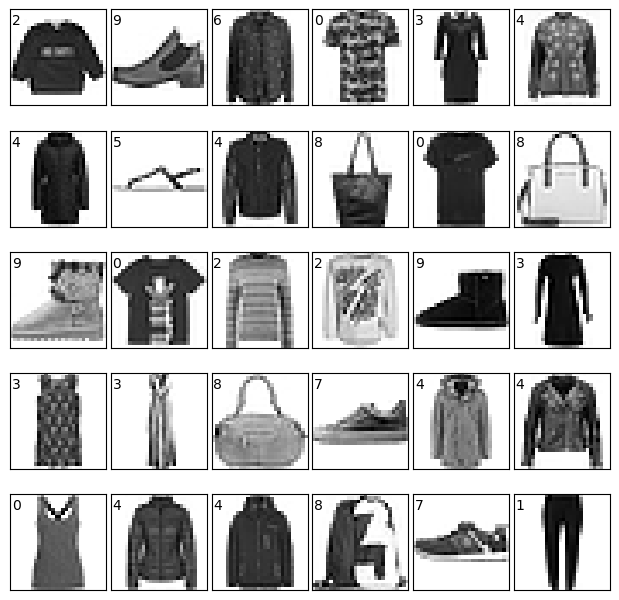

In [5]:
###########
# ANALYZE #
###########

# each row is an image
# train -> 60.0000 samples
# test -> 10.000 samples
# each sample is a 28x28 grayscale image -> 784 pixels in total (columns = features)
# each pixel has a value indicating the lightness/darkness between 0 and 255

# CATEGORIES = LABELS:
# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot


########
# LOAD #
########

fashion_mnist_train = pd.read_csv('data/fashion-mnist_train.csv').to_numpy()
fashion_mnist_test = pd.read_csv('data/fashion-mnist_test.csv').to_numpy()

features_train = fashion_mnist_train[:,1:]/255.0
features_test = fashion_mnist_test[:,1:]/255.0

labels_train = fashion_mnist_train[:, 0]
labels_test = fashion_mnist_test[:, 0]


#############
# VISUALIZE #
#############

fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(30):
  ax = fig.add_subplot(5, 6, i + 1, xticks=[], yticks=[])
  ax.imshow(features_train[i].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
  # label the image with the target value
  ax.text(0, 4, str(labels_train[i]))


### 3) SVM Model

In [6]:
############
# TRAINING #
############

model = SVC(C=50, kernel='poly', random_state=42)

model.fit(features_train, labels_train)


##############
# EVALUATION #
##############

accuracy = model.score(features_test, labels_test)
print(f'Model accuracy on the test dataset: {100 * accuracy:.2f}%')


##############
# PREDICTION #
##############

labels_pred = model.predict(features_test)


Model accuracy on the test dataset: 89.07%


### 4) Visualization

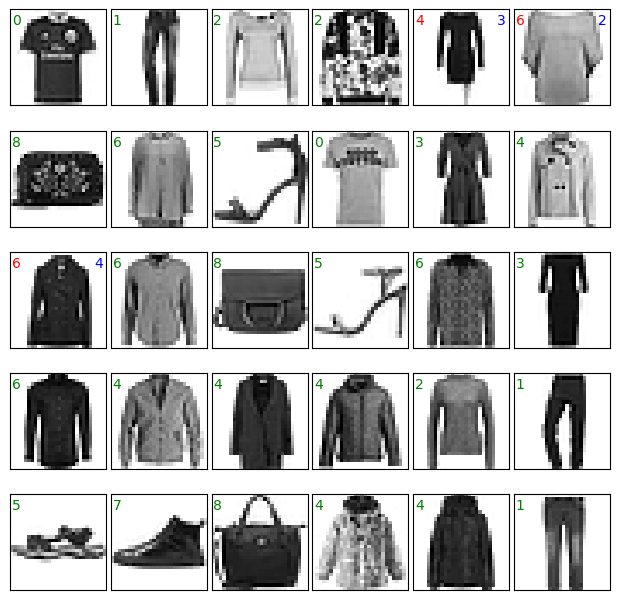

In [7]:
########
# PLOT #
########

fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(30):
  ax = fig.add_subplot(5, 6, i + 1, xticks=[], yticks=[])
  ax.imshow(features_test[i].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')

  if labels_pred[i] == labels_test[i]:
      ax.text(0, 4, labels_pred[i], color='green')
  else:
      ax.text(0, 4, labels_pred[i], color='red')
      ax.text(24, 4, labels_test[i], color='blue')


### 5) Confusion Matrix

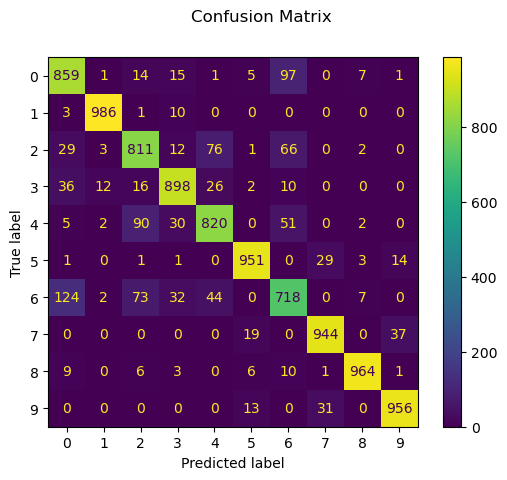

In [8]:
########
# PLOT #
########

disp = metrics.ConfusionMatrixDisplay.from_predictions(labels_test, labels_pred)
disp.figure_.suptitle('Confusion Matrix')

plt.show()